##Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import files
import numpy as np

In [2]:
uploaded = files.upload()
dataset=pd.read_csv('diabetes.csv')
dataset.head()

Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Handling Missing Data

In [ ]:
dataset.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
dataset.duplicated().sum()

np.int64(0)

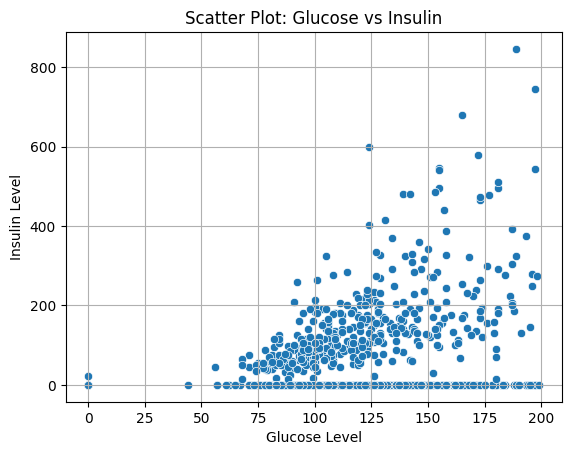

In [ ]:
# Scatter plot with regression line
sb.scatterplot(data=dataset, x="Glucose", y="Insulin")
plt.title("Scatter Plot: Glucose vs Insulin")
plt.xlabel("Glucose Level")
plt.ylabel("Insulin Level")
plt.grid()
plt.show()

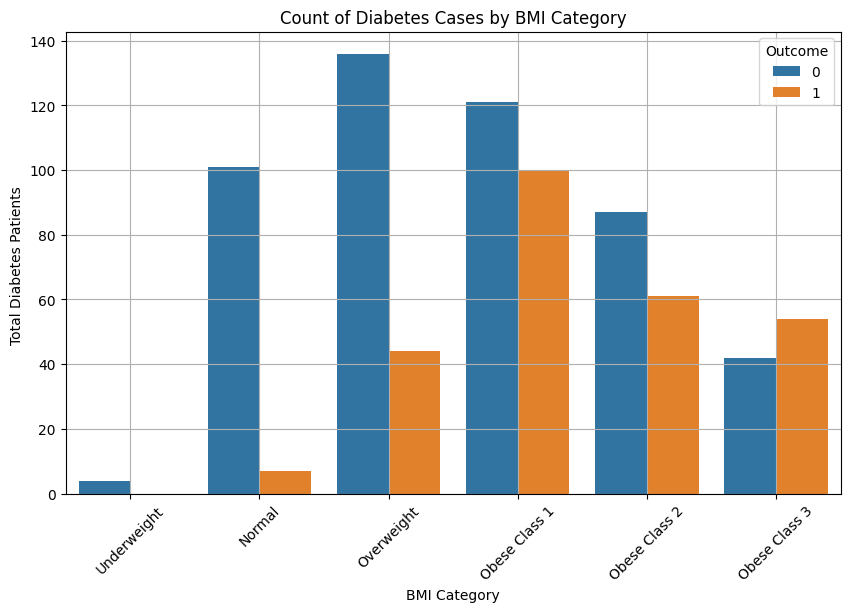

In [3]:
bins=[0,18.5,25,30,35,40,100]
labels=["Underweight", "Normal","Overweight","Obese Class 1","Obese Class 2","Obese Class 3"]

# Copy of Original Dataset
temp=dataset.copy()

temp["BMI_Category"]=pd.cut(temp["BMI"],bins=bins, labels=labels)
#dataset.groupby("BMI_Category").count()

# Cases/patients with only diabetes(outcome==1)
# diabetes_cases=temp[temp["Outcome"]==1
#sb.countplot(data=diabetes_cases, x="BMI_Category", hue="Outcome")  -> Bar plot of just diabetic cases(outcome==1) per BMI


#sb.countplot(data=temp, x="BMI_Category")  -> Bar plot of all people per BMI(outcome== 0 & 1 both) per BMI

plt.figure(figsize=(10, 6))
sb.countplot(data=temp, x="BMI_Category", hue="Outcome")  # Bar plot of total cases for both outcome-wise(1 and 0) per BMI

plt.title("Count of Diabetes Cases by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Total Diabetes Patients ")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [4]:
x=dataset.iloc[: , :-1]
y=dataset.iloc[: , -1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


##Splitting Dataset Into Train And Test

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

##HyperParameter Tuning And SVM Model Training

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc=SVC(probability=True)
param_grid = {'C': [0.1, 1],
              'kernel':['linear','rbf']
             }

grid_search=GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

# train model with hyperparameter tunning
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1], 'kernel': ['linear', 'rbf']})

## Predict Result

In [7]:
y_pred=grid_search.predict(x_test)
comparision=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(comparision)

     Actual  Predicted
668       0          0
324       0          0
624       0          0
690       0          0
473       0          0
..      ...        ...
355       1          1
534       0          0
344       0          0
296       1          0
462       0          0

[154 rows x 2 columns]


##User Input Prediction

In [ ]:
# === User Input ===
print("\n=== Diabetes Prediction App ===")
print("Please enter the following patient details:\n")

pregnancies = int(input("Pregnancies (0–15): "))
glucose = int(input("Glucose Level (e.g., 70–200 mg/dL): "))
blood_pressure = int(input("Blood Pressure (e.g., 40–120 mm Hg): "))
skin_thickness = int(input("Skin Thickness (0–99 mm): "))
insulin = int(input("Insulin Level (0–900 µU/mL): "))
bmi = float(input("BMI (15.0–50.0): "))
dpf = float(input("Diabetes Pedigree Function (0.1–2.5): "))
age = int(input("Age (18–80): "))

# Combine input
user_input = np.array([pregnancies, glucose, blood_pressure, skin_thickness,
                       insulin, bmi, dpf, age]).reshape(1, -1)

# Predict
prediction = grid_search.predict(user_input)

# Output
print("\n=== Prediction Result ===")
if prediction[0] == 1:
    print("Diabetes Detected!")
else:
    print("No Diabetes Detected.")



=== Diabetes Prediction App ===
Please enter the following patient details:

Pregnancies (0–15): 0
Glucose Level (e.g., 70–200 mg/dL): 70
Blood Pressure (e.g., 40–120 mm Hg): 40
Skin Thickness (0–99 mm): 50
Insulin Level (0–900 µU/mL): 150
BMI (15.0–50.0): 18
Diabetes Pedigree Function (0.1–2.5): 1
Age (18–80): 22

=== Prediction Result ===
No Diabetes Detected.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


##Confusion Matrix

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533
Precision: 0.6545454545454545
Recall: 0.6545454545454545
F1 Score: 0.6545454545454545
Confusion Matrix:
 [[80 19]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



##ROC And AUC Curve For SVM Model

AUC Score: 0.8143250688705235


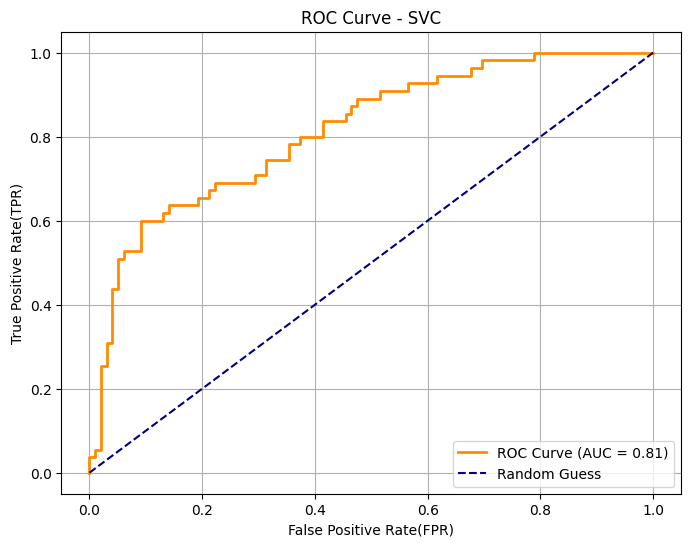

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score


#  Predict probabilities for class 1 (positive class)
y_pred_class = grid_search.predict_proba(x_test)[:, 1]

# ROC Curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class)

# AUC Score
auc_score=roc_auc_score(y_test, y_pred_class)
print("AUC Score:", auc_score)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="darkorange", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random Guess')
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve - SVC")
plt.legend(loc="lower right")
plt.grid()
plt.show()


##HyperParameter Tuning And XGBoost Model Training

In [10]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

grid_pram = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400, 500]
}

grid_search1 = GridSearchCV(estimator=xgb, param_grid=grid_pram, cv=5)

grid_search1.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500]})

##Predict Test Case Result

In [11]:
y_pred1=grid_search1.predict(x_test)
comparision1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred1})
print(comparision1)

     Actual  Predicted
668       0          0
324       0          0
624       0          0
690       0          0
473       0          0
..      ...        ...
355       1          1
534       0          0
344       0          0
296       1          0
462       0          0

[154 rows x 2 columns]


##User Input Prediction

In [ ]:
# === User Input ===
print("\n=== Diabetes Prediction App ===")
print("Please enter the following patient details:\n")

pregnancies = int(input("Pregnancies (0–15): "))
glucose = int(input("Glucose Level (e.g., 70–200 mg/dL): "))
blood_pressure = int(input("Blood Pressure (e.g., 40–120 mm Hg): "))
skin_thickness = int(input("Skin Thickness (0–99 mm): "))
insulin = int(input("Insulin Level (0–900 µU/mL): "))
bmi = float(input("BMI (15.0–50.0): "))
dpf = float(input("Diabetes Pedigree Function (0.1–2.5): "))
age = int(input("Age (18–80): "))

# Combine input
user_input1 = np.array([pregnancies, glucose, blood_pressure, skin_thickness,
                       insulin, bmi, dpf, age]).reshape(1, -1)

# Predict
prediction1 = grid_search1.predict(user_input1)

# Output
print("\n=== Prediction Result ===")
if prediction1[0] == 1:
    print("Diabetes Detected!")
else:
    print("No Diabetes Detected.")



=== Diabetes Prediction App ===
Please enter the following patient details:

Pregnancies (0–15): 10
Glucose Level (e.g., 70–200 mg/dL): 100
Blood Pressure (e.g., 40–120 mm Hg): 100
Skin Thickness (0–99 mm): 50
Insulin Level (0–900 µU/mL): 100
BMI (15.0–50.0): 20
Diabetes Pedigree Function (0.1–2.5): 2
Age (18–80): 22

=== Prediction Result ===
No Diabetes Detected.


##Confusion Matrix

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)

# Precision
precision1 = precision_score(y_test, y_pred1)
print("Precision:", precision1)

# Recall
recall1 = recall_score(y_test, y_pred1)
print("Recall:", recall1)

# F1 Score
f11 = f1_score(y_test, y_pred1)
print("F1 Score:", f11)

# Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", cm1)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred1))


Accuracy: 0.7532467532467533
Precision: 0.6545454545454545
Recall: 0.6545454545454545
F1 Score: 0.6545454545454545
Confusion Matrix:
 [[80 19]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



##ROC And AUC Curve For XGBoost Model

AUC Score: 0.8157943067033977


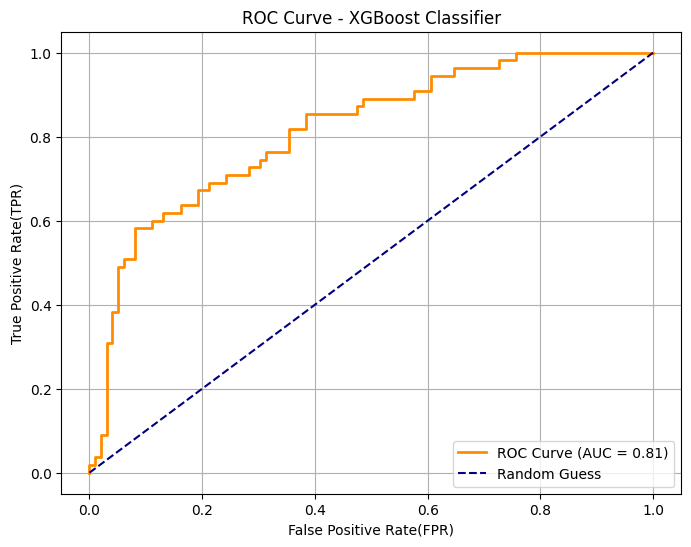

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score


#  Predict probabilities for class 1 (positive class)
y_pred_class1 = grid_search1.predict_proba(x_test)[:, 1]

# ROC Curve values
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_class1)

# AUC Score
auc_score1=roc_auc_score(y_test, y_pred_class1)
print("AUC Score:", auc_score1)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f"ROC Curve (AUC = {auc_score:.2f})", color="darkorange", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random Guess')
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve - XGBoost Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
dataset.shape[0]



768